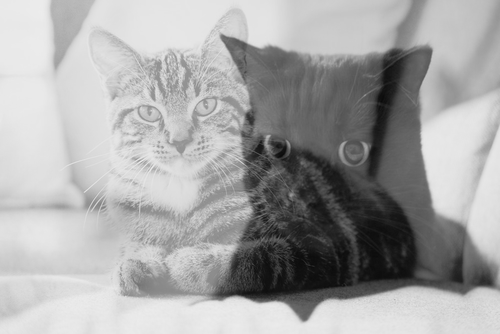

In [9]:
using Images, FileIO, Colors
cat_one = load("cat_one_resize.jpg")
cat_oneg = Gray.(cat_one)
#
cat_two = load("cat_two_resize.jpg")
cat_twog = Gray.(cat_two)
#
mat_one = convert(Array{Float64},cat_oneg);
mat_two = convert(Array{Float64},cat_twog);
#get rows and column to later reconstruct the mixed image
rows,col = size(mat_one)
#convert 2D images to 1D (vector)
vec_one = vec(mat_one)';
vec_two = vec(mat_two)';

S = vcat(vec_one , vec_two)';

#generate first mixed signal
#factor used for the image
#A = [0.2 , 0.8] 
A = [0.6 , 0.4] 

X = (S .* A')'

X = X[1,:,]+X[2,:,]

imageX = reshape(X,rows,col)
img = colorview(Gray, imageX)
#
#generate second mixed signal
#factor used for the image
#A = [0.8 , 0.2] 
A = [0.4 , 0.6] 
Z = (S .* A')'

Z = Z[1,:,]+Z[2,:,]
mixed_signal = hcat(X,Z);
imageZ = reshape(Z,rows,col)
img = colorview(Gray,imageZ)

In [2]:
struct mat
    _0::Cuintmax_t
end

struct sv
    u::mat
    s::mat
    v::mat
end

In [3]:
#mixed= ccall((:create_matrix,"fica"), mat , (Ptr{Cdouble},Cuintmax_t,Cuintmax_t), mixed_signal,2,167000)

mat(0x000000008b350770)

In [4]:
#svdres = ccall((:normalized_svd,"fica") , sv, (mat,), mixed)

sv(mat(0x00000000a367d220), mat(0x00000000a367cca0), mat(0x00000000a367c880))

In [3]:
include("fastICA.jl")

W = fastICA.whiten(mixed_signal)
X1 = mixed_signal * W'

wmat= ccall((:create_matrix,"fica"), mat , (Ptr{Cdouble},Cuintmax_t,Cuintmax_t), X1,2,167000)

mat(0x000000008db0b540)

In [4]:
wei = [0.86456941 1.0646533 ; 0.07053282 0.8470662]
winit= ccall((:create_matrix,"fica"), mat , (Ptr{Cdouble},Cuintmax_t,Cuintmax_t), wei,2,2)

mat(0x000000008db0d4e0)

In [ ]:
res = ccall((:fast_ica,"fica"), mat,(mat,mat,Cuintmax_t,Cuintmax_t,Cdouble,Cdouble,Cuint),wmat,winit,2,200,0.0001,1.,0)

In [5]:
ccall((:print_matrix,"fica"),Cvoid,(mat,),winit)


[2 2 1 1]
    0.8646     1.0647 
    0.0705     0.8471 



In [ ]:
ccall((:move_matrix,"fica"),Cvoid, (mat,Ptr{Float64},Cuintmax_t), pcaw,a,4*4)

In [36]:
cols=Ref{Cuintmax_t}(convert(Cint,0))
rows =Ref{Cuintmax_t}(convert(Cint,0))

Base.RefValue{UInt64}(0x0000000000000000)

In [2]:
a

UndefVarError: UndefVarError: a not defined

In [15]:
A = [1. 2. 3. 4.]
B = [4. 4. 4. 4.]

1×4 Array{Float64,2}:
 4.0  4.0  4.0  4.0

In [10]:
maximum(abs.(abs.(sum(A .* B)) .- 1.0))

39.0

In [11]:
A .* B

1×4 Array{Float64,2}:
 4.0  8.0  12.0  16.0

In [2]:
sum(A .* B)

UndefVarError: UndefVarError: B not defined

In [8]:
X

167000-element Array{Float64,1}:
 0.868235294117647 
 0.8705882352941177
 0.8705882352941177
 0.8705882352941177
 0.8729411764705882
 0.8729411764705882
 0.8752941176470588
 0.8752941176470588
 0.8729411764705882
 0.8729411764705882
 0.8729411764705882
 0.8705882352941177
 0.8705882352941177
 ⋮                 
 0.7968627450980392
 0.803921568627451 
 0.8015686274509803
 0.7945098039215686
 0.803921568627451 
 0.7686274509803921
 0.7592156862745099
 0.8015686274509803
 0.8109803921568628
 0.8164705882352941
 0.8062745098039215
 0.7905882352941176

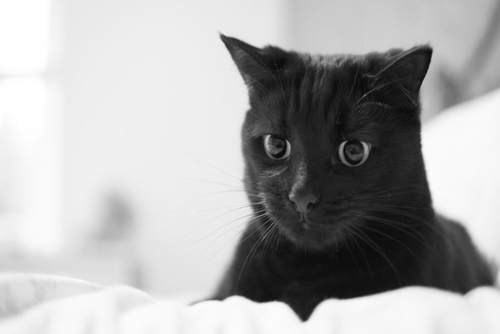

In [10]:
cat_two = load("cat_two_resize.jpg")
cat_twog = Gray.(cat_two)

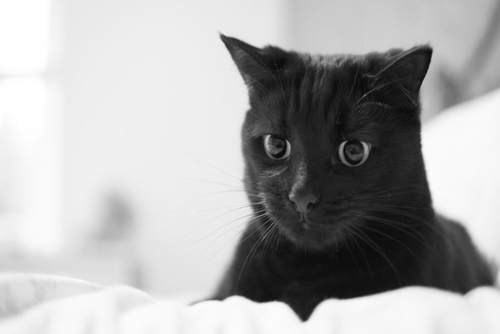

In [11]:
cat_twog

In [13]:
mixed_signal'

2×167000 LinearAlgebra.Adjoint{Float64,Array{Float64,2}}:
 0.868235  0.870588  0.870588  0.870588  …  0.816471  0.806275  0.790588
 0.912157  0.913725  0.913725  0.913725     0.861961  0.856471  0.844706